In [2]:
from fastai.basics import *
from fastai.callback.all import *
from fastai.vision.all import *
from fastai.medical.imaging import *
import pydicom
import pandas as pd
import os
import glob
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from scipy import ndimage
from skimage import morphology
from skimage.transform import resize
import cv2
import pickle

from PIL import Image

In [6]:
spine_xrays = get_dicom_files("/scratch1/08068/ekun/unzipped_DXA_Images/AP_Spine")

files = []
all_rows = []
all_cols = []
all_pixel_lengths = []

i = 0
while i < 10: 
    xray_sample = spine_xrays[i].dcmread()
#     print(str(spine_xrays[i])[50:])
#     print(xray_sample)
#     xray_sample.show()
#     print()
#     print("Pixel shape and array:")
#     print(xray_sample.pixel_array.shape)
#     print(xray_sample.pixel_array)
    rows = xray_sample[0x00280010].value
    cols = xray_sample[0x00280011].value
#     print(rows)
#     print(cols)
#     print()
    pixels = rows*cols
    files.append(str(spine_xrays[i])[50:])
    all_rows.append(rows)
    all_cols.append(cols)
    all_pixel_lengths.append(pixels)
    i += 1

In [7]:
df = pd.DataFrame()
df["File"] = files
df["Rows"] = all_rows
df["Columns"] = all_cols
df["Pixel Lengths"] = all_pixel_lengths
df

,File,Rows,Columns,Pixel Lengths
0,1.2.840.113619.2.110.210419.20150914144220.2.2.12.1.dcm,777,716,556332
1,1.2.840.113619.2.110.210419.20190407085742.1.2.12.1.dcm,726,720,522720
2,1.2.840.113619.2.110.212038.20170613150953.1.2.12.1.dcm,718,720,516960
3,1.2.840.113619.2.110.212174.20190320155251.1.2.12.1.dcm,660,720,475200
4,1.2.840.113619.2.110.210419.20170208105838.1.2.12.1.dcm,712,716,509792
5,1.2.840.113619.2.110.212174.20190922143003.1.2.12.1.dcm,785,720,565200
6,1.2.840.113619.2.110.212174.20190502170339.1.2.12.1.dcm,659,720,474480
7,1.2.840.113619.2.110.210419.20190901170249.1.2.12.1.dcm,786,720,565920
8,1.2.840.113619.2.110.212038.20180812142743.1.2.12.1.dcm,721,720,519120
9,1.2.840.113619.2.110.210419.20190206144254.1.2.12.1.dcm,789,720,568080


In [20]:
#df.to_csv("/work2/08068/ekun/frontera/output_files/AP_Spine_image_size.csv", sep='\t', index = False)

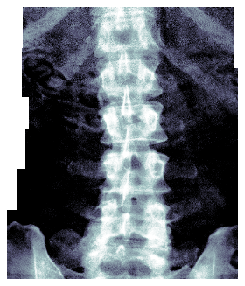

In [31]:
path = Path("/scratch1/08068/ekun/unzipped_DXA_Images/AP_Spine/1.2.840.113619.2.110.210419.20170226164133.1.2.12.1.dcm")
xray_sample = path.dcmread()
xray_sample.show()

In [28]:
row_sorted_df = df.sort_values(by=['Rows'], ascending=True)
row_sorted_df

,File,Rows,Columns,Pixel Lengths
25797,1.2.840.113619.2.110.210419.20151004170027.2.2.12.1.dcm,156,716,111696
20577,1.2.840.113619.2.110.212038.20180124101224.1.2.12.1.dcm,157,720,113040
22117,1.2.840.113619.2.110.210419.20170120130957.1.2.12.1.dcm,250,276,69000
12268,1.2.840.113619.2.110.210419.20170120142954.1.2.12.1.dcm,252,276,69552
11225,1.2.840.113619.2.110.210419.20170120131639.1.2.12.1.dcm,253,276,69828
...,...,...,...,...
19362,1.2.840.113619.2.110.210419.20170519144856.1.2.12.1.dcm,911,716,652276
14089,1.2.840.113619.2.110.210419.20190128171728.1.2.12.1.dcm,912,720,656640
27477,1.2.840.113619.2.110.212038.20190708181429.1.2.12.1.dcm,913,720,657360
5173,1.2.840.113619.2.110.210419.20180913153657.1.2.12.1.dcm,915,720,658800


In [7]:
x=np.array(list(df["Rows"]))
print("Number of unique items: " + str(len(np.unique(x))))
print()
rows = (np.unique(x))
for item in rows:
    print(str(list(df["Rows"]).count(item)) + " image(s) have " + str(item) + " rows")
    print()

Number of unique items: 180

1 image(s) have 156 rows

1 image(s) have 157 rows

1 image(s) have 250 rows

1 image(s) have 252 rows

1 image(s) have 253 rows

1 image(s) have 273 rows

2 image(s) have 274 rows

7 image(s) have 275 rows

7 image(s) have 276 rows

3 image(s) have 277 rows

1 image(s) have 278 rows

2 image(s) have 298 rows

4 image(s) have 299 rows

5 image(s) have 300 rows

5 image(s) have 301 rows

5 image(s) have 302 rows

1 image(s) have 310 rows

3 image(s) have 311 rows

1 image(s) have 526 rows

1 image(s) have 527 rows

2 image(s) have 528 rows

5 image(s) have 529 rows

1 image(s) have 530 rows

2 image(s) have 531 rows

1 image(s) have 532 rows

1 image(s) have 533 rows

1 image(s) have 536 rows

1 image(s) have 537 rows

1 image(s) have 582 rows

1 image(s) have 584 rows

6 image(s) have 585 rows

10 image(s) have 586 rows

16 image(s) have 587 rows

19 image(s) have 588 rows

32 image(s) have 589 rows

50 image(s) have 590 rows

59 image(s) have 591 rows

50 

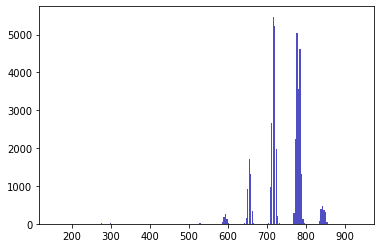

In [8]:
plt.hist(x = df["Rows"], bins='auto', color='#0504aa', alpha=0.7, rwidth=0.85)
plt.show()

In [22]:
col_sorted_df = df.sort_values(by=['Columns'], ascending=True)
col_sorted_df

,File,Rows,Columns,Pixel Lengths
23227,1.2.840.113619.2.110.210419.20170226164133.1.2.12.1.dcm,311,264,82104
27249,1.2.840.113619.2.110.210419.20170120130416.1.2.12.1.dcm,311,264,82104
16583,1.2.840.113619.2.110.210419.20170227100038.1.2.12.1.dcm,310,264,81840
13960,1.2.840.113619.2.110.210419.20170226163634.1.2.12.1.dcm,311,264,82104
34495,1.2.840.113619.2.110.210419.20161030163351.1.2.12.1.dcm,301,276,83076
...,...,...,...,...
32818,1.2.840.113619.2.110.212174.20190329090146.1.2.12.1.dcm,783,724,566892
34465,1.2.840.113619.2.110.212174.20190226094358.1.2.12.1.dcm,721,724,522004
27860,1.2.840.113619.2.110.210419.20190907090136.1.2.12.1.dcm,727,724,526348
18815,1.2.840.113619.2.110.212174.20180725170841.1.2.12.1.dcm,847,736,623392


In [10]:
x=np.array(list(df["Columns"]))
print("Number of unique items: " + str(len(np.unique(x))))
print()
cols = (np.unique(x))
for item in cols:
    print(str(list(df["Columns"]).count(item)) + " image(s) have " + str(item) + " columns")
    print()

Number of unique items: 14

4 image(s) have 264 columns

45 image(s) have 276 columns

12 image(s) have 600 columns

3 image(s) have 620 columns

346 image(s) have 640 columns

2 image(s) have 660 columns

10 image(s) have 680 columns

1 image(s) have 692 columns

1 image(s) have 700 columns

18120 image(s) have 716 columns

21945 image(s) have 720 columns

93 image(s) have 724 columns

1 image(s) have 736 columns

1 image(s) have 800 columns



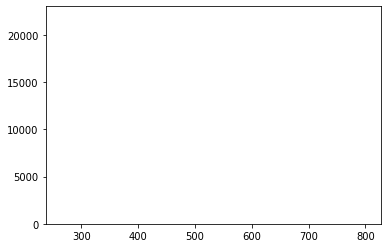

In [11]:
plt.hist(x = df["Columns"], bins='auto', color='#0504aa', alpha=0.7, rwidth=0.85)
plt.show()

In [33]:
pd.set_option('display.max_rows', None)
df.groupby(['Rows','Columns']).size().reset_index().rename(columns={0:'count'})

,Rows,Columns,count
0,156,716,1
1,157,720,1
2,250,276,1
3,252,276,1
4,253,276,1
5,273,276,1
6,274,276,2
7,275,276,7
8,276,276,7
9,277,276,3


In [4]:
df = pd.read_csv("/work2/08068/ekun/frontera/output_files/AP_Spine_image_size.csv", delimiter = "\t")
df

,File,Rows,Columns,Pixel Lengths
0,1.2.840.113619.2.110.210419.20150914144220.2.2.12.1.dcm,777,716,556332
1,1.2.840.113619.2.110.210419.20190407085742.1.2.12.1.dcm,726,720,522720
2,1.2.840.113619.2.110.212038.20170613150953.1.2.12.1.dcm,718,720,516960
3,1.2.840.113619.2.110.212174.20190320155251.1.2.12.1.dcm,660,720,475200
4,1.2.840.113619.2.110.210419.20170208105838.1.2.12.1.dcm,712,716,509792
...,...,...,...,...
40579,1.2.840.113619.2.110.210419.20170301184220.1.2.12.1.dcm,714,716,511224
40580,1.2.840.113619.2.110.212038.20180914150748.1.2.12.1.dcm,722,720,519840
40581,1.2.840.113619.2.110.212038.20190107153606.1.2.12.1.dcm,717,720,516240
40582,1.2.840.113619.2.110.210419.20190821134724.1.2.12.1.dcm,788,720,567360


In [2]:
patients = pd.read_csv('/work2/08068/ekun/frontera/output_files/DXA_Images_by_bodypart/DXA_AP_Spine.csv', delimiter = "\t")
patients

,Patient EID,Spine
0,1000276,/scratch1/08068/ekun/unzipped_DXA_Images/1000276_20158_2_0_unzip/1.2.840.113619.2.110.210419.20160630134640.1.2.12.1.dcm
1,1000308,/scratch1/08068/ekun/unzipped_DXA_Images/1000308_20158_2_0_unzip/1.2.840.113619.2.110.212038.20190713145948.1.2.12.1.dcm
2,1000320,/scratch1/08068/ekun/unzipped_DXA_Images/1000320_20158_2_0_unzip/1.2.840.113619.2.110.210419.20180924120836.1.2.12.1.dcm
3,1000592,/scratch1/08068/ekun/unzipped_DXA_Images/1000592_20158_2_0_unzip/1.2.840.113619.2.110.210419.20180521101441.1.2.12.1.dcm
4,1000742,/scratch1/08068/ekun/unzipped_DXA_Images/1000742_20158_2_0_unzip/1.2.840.113619.2.110.210419.20170305174200.1.2.12.1.dcm
...,...,...
40581,6024119,/scratch1/08068/ekun/unzipped_DXA_Images/6024119_20158_2_0_unzip/1.2.840.113619.2.110.212038.20180618143152.1.2.12.1.dcm
40582,6024257,/scratch1/08068/ekun/unzipped_DXA_Images/6024257_20158_2_0_unzip/1.2.840.113619.2.110.210419.20190219154140.1.2.12.1.dcm
40583,6024325,/scratch1/08068/ekun/unzipped_DXA_Images/6024325_20158_2_0_unzip/1.2.840.113619.2.110.212038.20190730161132.1.2.12.1.dcm
40584,6024532,/scratch1/08068/ekun/unzipped_DXA_Images/6024532_20158_2_0_unzip/1.2.840.113619.2.110.210419.20180912183218.1.2.12.1.dcm


In [8]:
files = []
for file in patients["Spine"]:
    files.append(file[65:])
    
patients["File"] = files
patients

,Patient EID,Spine,File
0,1000276,/scratch1/08068/ekun/unzipped_DXA_Images/1000276_20158_2_0_unzip/1.2.840.113619.2.110.210419.20160630134640.1.2.12.1.dcm,1.2.840.113619.2.110.210419.20160630134640.1.2.12.1.dcm
1,1000308,/scratch1/08068/ekun/unzipped_DXA_Images/1000308_20158_2_0_unzip/1.2.840.113619.2.110.212038.20190713145948.1.2.12.1.dcm,1.2.840.113619.2.110.212038.20190713145948.1.2.12.1.dcm
2,1000320,/scratch1/08068/ekun/unzipped_DXA_Images/1000320_20158_2_0_unzip/1.2.840.113619.2.110.210419.20180924120836.1.2.12.1.dcm,1.2.840.113619.2.110.210419.20180924120836.1.2.12.1.dcm
3,1000592,/scratch1/08068/ekun/unzipped_DXA_Images/1000592_20158_2_0_unzip/1.2.840.113619.2.110.210419.20180521101441.1.2.12.1.dcm,1.2.840.113619.2.110.210419.20180521101441.1.2.12.1.dcm
4,1000742,/scratch1/08068/ekun/unzipped_DXA_Images/1000742_20158_2_0_unzip/1.2.840.113619.2.110.210419.20170305174200.1.2.12.1.dcm,1.2.840.113619.2.110.210419.20170305174200.1.2.12.1.dcm
...,...,...,...
40581,6024119,/scratch1/08068/ekun/unzipped_DXA_Images/6024119_20158_2_0_unzip/1.2.840.113619.2.110.212038.20180618143152.1.2.12.1.dcm,1.2.840.113619.2.110.212038.20180618143152.1.2.12.1.dcm
40582,6024257,/scratch1/08068/ekun/unzipped_DXA_Images/6024257_20158_2_0_unzip/1.2.840.113619.2.110.210419.20190219154140.1.2.12.1.dcm,1.2.840.113619.2.110.210419.20190219154140.1.2.12.1.dcm
40583,6024325,/scratch1/08068/ekun/unzipped_DXA_Images/6024325_20158_2_0_unzip/1.2.840.113619.2.110.212038.20190730161132.1.2.12.1.dcm,1.2.840.113619.2.110.212038.20190730161132.1.2.12.1.dcm
40584,6024532,/scratch1/08068/ekun/unzipped_DXA_Images/6024532_20158_2_0_unzip/1.2.840.113619.2.110.210419.20180912183218.1.2.12.1.dcm,1.2.840.113619.2.110.210419.20180912183218.1.2.12.1.dcm


In [9]:
mergedDf = patients.merge(df, left_on='File', right_on='File', how='right')
mergedDf = mergedDf.drop(columns = ["Spine"])
mergedDf

,Patient EID,File,Rows,Columns,Pixel Lengths
0,1000276,1.2.840.113619.2.110.210419.20160630134640.1.2.12.1.dcm,716,716,512656
1,1000308,1.2.840.113619.2.110.212038.20190713145948.1.2.12.1.dcm,722,720,519840
2,1000320,1.2.840.113619.2.110.210419.20180924120836.1.2.12.1.dcm,722,720,519840
3,1000592,1.2.840.113619.2.110.210419.20180521101441.1.2.12.1.dcm,787,720,566640
4,1000742,1.2.840.113619.2.110.210419.20170305174200.1.2.12.1.dcm,712,716,509792
...,...,...,...,...,...
40579,6024119,1.2.840.113619.2.110.212038.20180618143152.1.2.12.1.dcm,717,720,516240
40580,6024257,1.2.840.113619.2.110.210419.20190219154140.1.2.12.1.dcm,785,720,565200
40581,6024325,1.2.840.113619.2.110.212038.20190730161132.1.2.12.1.dcm,657,720,473040
40582,6024532,1.2.840.113619.2.110.210419.20180912183218.1.2.12.1.dcm,783,720,563760


In [10]:
mergedDf.to_csv("/work2/08068/ekun/frontera/output_files/DXA_Images_by_bodypart/DXA_AP_Spine_Files.csv", sep='\t', index = False)

## Adding padding to images

In [2]:
mergedDf = pd.read_csv("/work2/08068/ekun/frontera/output_files/DXA_Images_by_bodypart/DXA_AP_Spine_Files.csv", delimiter = "\t")

In [3]:
mergedDf

,Patient EID,File,Rows,Columns,Pixel Lengths
0,1000276,1.2.840.113619.2.110.210419.20160630134640.1.2.12.1.dcm,716,716,512656
1,1000308,1.2.840.113619.2.110.212038.20190713145948.1.2.12.1.dcm,722,720,519840
2,1000320,1.2.840.113619.2.110.210419.20180924120836.1.2.12.1.dcm,722,720,519840
3,1000592,1.2.840.113619.2.110.210419.20180521101441.1.2.12.1.dcm,787,720,566640
4,1000742,1.2.840.113619.2.110.210419.20170305174200.1.2.12.1.dcm,712,716,509792
...,...,...,...,...,...
40579,6024119,1.2.840.113619.2.110.212038.20180618143152.1.2.12.1.dcm,717,720,516240
40580,6024257,1.2.840.113619.2.110.210419.20190219154140.1.2.12.1.dcm,785,720,565200
40581,6024325,1.2.840.113619.2.110.212038.20190730161132.1.2.12.1.dcm,657,720,473040
40582,6024532,1.2.840.113619.2.110.210419.20180912183218.1.2.12.1.dcm,783,720,563760


In [4]:
def add_pad(image, new_height, new_width):
    height, width = image.shape

    final_image = np.zeros((new_height, new_width))

    pad_left = int((new_width - width) / 2)
    pad_top = int((new_height - height) / 2)
    
    # Replace the pixels with the image's pixels
    final_image[pad_top:pad_top + height, pad_left:pad_left + width] = image
    
    return final_image

In [5]:
spine_xrays = get_dicom_files("/scratch1/08068/ekun/unzipped_DXA_Images/AP_Spine")

files = []

i = 0
while i < len(spine_xrays): 
    xray_sample = spine_xrays[i].dcmread()
    image = xray_sample.pixel_array
    rows = xray_sample[0x00280010].value
    cols = xray_sample[0x00280011].value
    if cols > 700 and cols < 725 and rows > 600 and rows < 800:
        files.append(str(spine_xrays[i])[50:])
        final_image = add_pad(image, 800, 800)
        pixel_array_np = final_image
        f = Path(spine_xrays[i]).name
        img = f.replace('.dcm', '.jpg')
        jpg_directory = "/scratch1/08068/ekun/unzipped_DXA_Images/AP_Spine_padded"
        cv2.imwrite(os.path.join(jpg_directory, img), pixel_array_np)
        new_file_name = Path(jpg_directory/Path(img))
    i += 1
    
df = pd.DataFrame()
df["File"] = files
new_df = mergedDf.merge(df, left_on='File', right_on='File', how='right')
new_df.to_csv("/scratch1/08068/ekun/unzipped_DXA_Images/AP_Spine_padded/pixel_data.csv", sep='\t', index = False)
new_df

,Patient EID,File,Rows,Columns,Pixel Lengths
0,1000276,1.2.840.113619.2.110.210419.20160630134640.1.2.12.1.dcm,716,716,512656
1,1000308,1.2.840.113619.2.110.212038.20190713145948.1.2.12.1.dcm,722,720,519840
2,1000320,1.2.840.113619.2.110.210419.20180924120836.1.2.12.1.dcm,722,720,519840
3,1000592,1.2.840.113619.2.110.210419.20180521101441.1.2.12.1.dcm,787,720,566640
4,1000742,1.2.840.113619.2.110.210419.20170305174200.1.2.12.1.dcm,712,716,509792
...,...,...,...,...,...
37854,6024119,1.2.840.113619.2.110.212038.20180618143152.1.2.12.1.dcm,717,720,516240
37855,6024257,1.2.840.113619.2.110.210419.20190219154140.1.2.12.1.dcm,785,720,565200
37856,6024325,1.2.840.113619.2.110.212038.20190730161132.1.2.12.1.dcm,657,720,473040
37857,6024532,1.2.840.113619.2.110.210419.20180912183218.1.2.12.1.dcm,783,720,563760


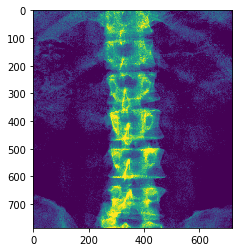

In [6]:
plt.imshow(image)

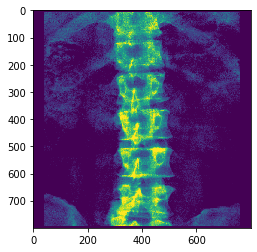

In [7]:
plt.imshow(final_image)